In [5]:
import pandas as pd 

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4


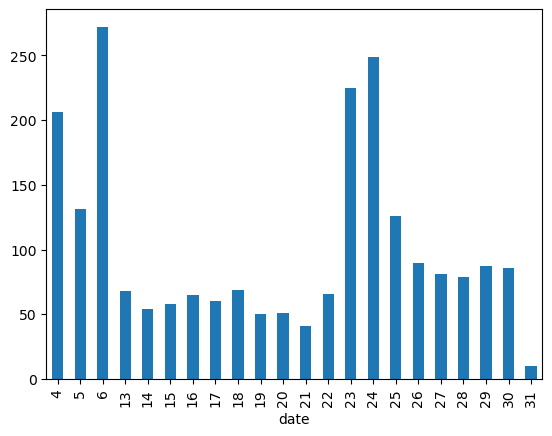

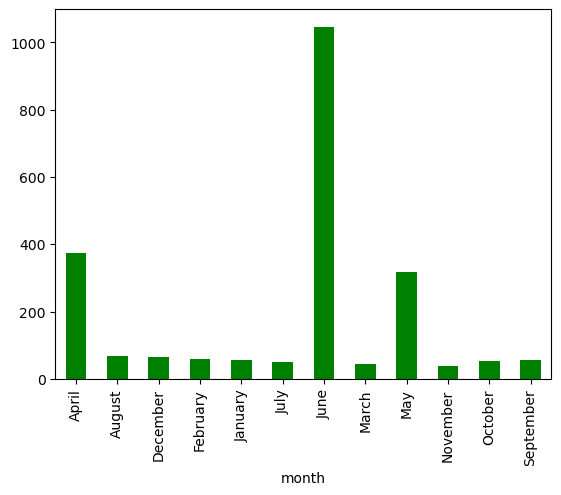

In [8]:
#provide the trend chart for number of complaints at monthy and daily granularity level 

df["month"]=pd.to_datetime(df["Date_month_year"]).dt.month_name()
df["date"]=pd.to_datetime(df["Date_month_year"]).dt.day

display(df.head(2))

df.groupby(["date"])["Customer Complaint"].count().plot(kind ="bar")
plt.show()

df.groupby(["month"])["Customer Complaint"].count().plot(kind="bar",color="green")
plt.show()

In [9]:
#providing a table with the frequency of comlaint type 

df["Customer Complaint"].str.lower().value_counts().to_frame().reset_index()

,index,Customer Complaint
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18
...,...,...
1735,monthly data caps,1
1736,"comcast/xfinity poor service, fraudulent billi...",1
1737,lost emails/billing,1
1738,improper billing and non resolution of issues,1


In [10]:
#which comlaints type is maximum i.e around internet , network issue , or across any other domain .

df["Customer Complaint"].str.lower().value_counts().head()

comcast              102
comcast data cap      30
comcast internet      29
comcast data caps     21
comcast billing       18
Name: Customer Complaint, dtype: int64

In [11]:
df.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [12]:
# creating a new categorical variable with value as open and closed , open and pending is to categorised as open and closed 

df["Status"]=df["Status"].apply(lambda x : "Open" if ((x=="Open") | (x=="Pending")) else "Closed")

In [13]:
df.Status.value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

In [14]:
'''
values=[]
for i in df["status"] :

if ((i=="Open")or(i=="pending")):
values.append("Closed")

else:
values.append("Closed")
df["Status"]=values

'''

'\nvalues=[]\nfor i in df["status"] :\n\nif ((i=="Open")or(i=="pending")):\nvalues.append("Closed")\n\nelse:\nvalues.append("Closed")\ndf["Status"]=values\n\n'

In [15]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4


'Open'

,State,Status
0,Alabama,9
1,Arizona,6


'Closed'

,State,Status
0,Alabama,17
1,Arizona,14


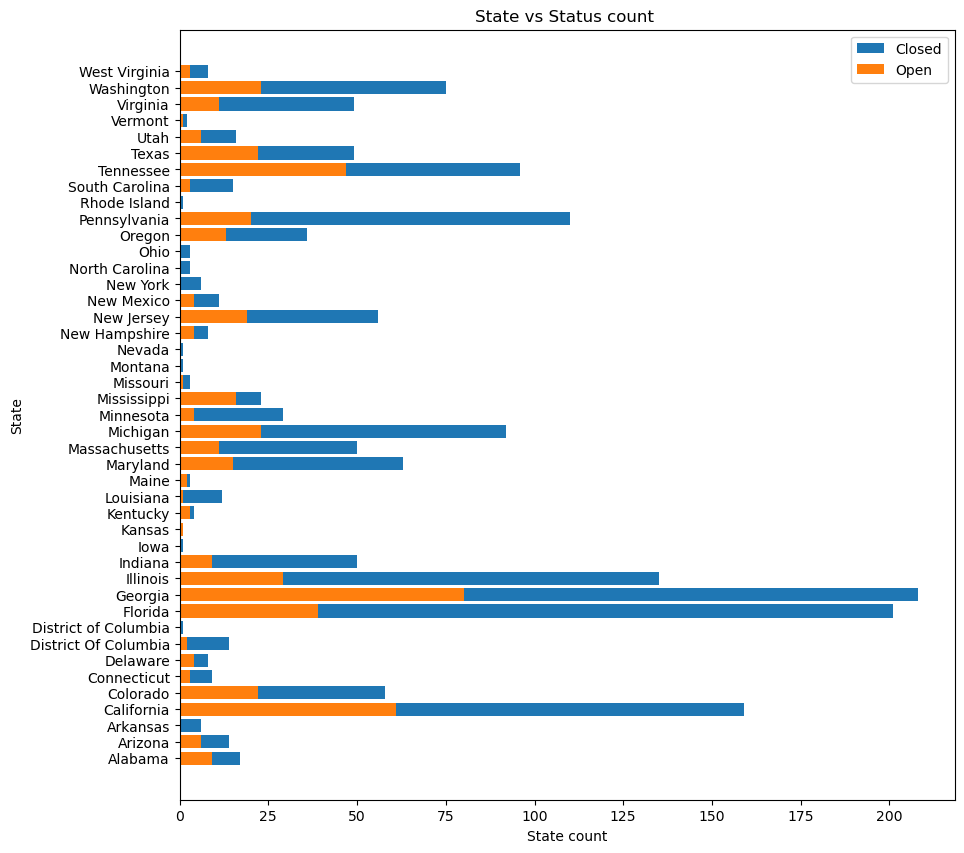

In [16]:
#providing statewise status of complaint in stacked bar chart .


op=df[df['Status']=="Open"].groupby(["State"])['Status'].count().to_frame().reset_index()
cl=df[df['Status']=="Closed"].groupby(["State"])['Status'].count().to_frame().reset_index()

display('Open', op.head(2))
display('Closed' , cl.head(2))

fig = plt.figure(figsize=(10,10))

plt.barh(cl.State , cl.Status)
plt.barh(op.State , op.Status)

plt.ylabel("State" , size=10)
plt.xlabel("State count")
plt.legend(["Closed","Open"])
plt.title("State vs Status count ")

plt.show()


In [17]:
op.sort_values('Status' , ascending=False).head(3)

,State,Status
8,Georgia,80
2,California,61
27,Tennessee,47


In [18]:
cl.sort_values("Status" , ascending = False).head(3)

,State,Status
10,Georgia,208
9,Florida,201
3,California,159


In [19]:
"Georgia" # has maximum complaints

'Georgia'

In [20]:
op.head(1)

,State,Status
0,Alabama,9


In [22]:
all_state_total_comp=df.groupby(["State"])["Status"].count().to_frame().sort_values('Status',ascending =False)

all_state_total_comp.head()

,Status
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


In [25]:
#which sate has highest percentage of unresolved complaints i.e ratio of open complaints wrt to all total complaints
# open / (open+closed )

unresolved_df=all_state_total_comp.merge(op,on="State")

display(unresolved_df.head(2))

unresolved_df["perc_ur"]=(unresolved_df['Status_y']/unresolved_df["Status_x"])*100

display(unresolved_df.head(2))

unresolved_df.sort_values("perc_ur",ascending=False).head(5)




,State,Status_x,Status_y
0,Georgia,288,80
1,Florida,240,39


,State,Status_x,Status_y,perc_ur
0,Georgia,288,80,27.777778
1,Florida,240,39,16.250000


,State,Status_x,Status_y,perc_ur
33,Kansas,2,1,50.000000
29,Kentucky,7,3,42.857143
16,Mississippi,39,16,41.025641
30,Maine,5,2,40.000000
18,Alabama,26,9,34.615385


In [26]:
"kanas" # state have heighest number of complaints 

'kanas'

In [27]:
df["Status"].value_counts(normalize=True)*100



Closed    76.753597
Open      23.246403
Name: Status, dtype: float64

In [28]:
#percentage of complaints resolve till date 
df[df["Status"]=="Closed"][["Received Via"]].value_counts(normalize=True)*100

Received Via      
Customer Care Call    50.615114
Internet              49.384886
dtype: float64